Q 1 :

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import Series
from numpy.random import randn
from mpl_toolkits import mplot3d

In [ ]:
test = pd.read_csv('test.csv')
m=len(test['x'])
x = np.array(test["x"]).reshape(m,1)
y = np.array(test["y"]).reshape(m,1)

In [24]:
def call_cost(theta,x,y):
    m=len(x)
    prediction = np.dot(x,theta) 
    cost = (1/(2*m))* np.sum(np.square(prediction - y ))
    return cost

In [3]:
def grad_desc(x,y,theta,alpha,iterations):
    m=len(y)
    # this loop updates the magnitude of theta vector  
    for i in range(iterations):
        #we start prediction with initial condition
        prediction = np.dot(x,theta)  
        theta = theta - (1/m)*alpha*(np.dot(x.T,(prediction - y)))     
    cost = call_cost(theta,x,y)
    plt.plot(x[:,1], y ,'ro',x[:,1],prediction , 'g^' )
    return theta , cost 

theta0 :  -1.216473251360072
theta1 :  1.0256276436347913
H_theta =  -1.216473251360072  +  X  1.0256276436347913
cost :  4.649879085730707


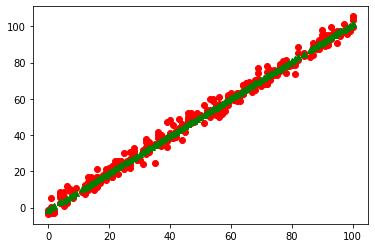

In [4]:
alpha = 0.0000001 
iterations = 100000
theta = np.random.randn(2,1)  # random initial condition 
# this line concatinate 1 to a x vector to make theta vector and x vector the same size 
X_b = np.c_[np.ones((len(x),1)),x]
theta_ , cost = grad_desc (X_b , y , theta ,alpha , iterations)
print("theta0 : ",theta_[0][0],sep=' ')
print("theta1 : ",theta_[1][0],sep=' ')
print("H_theta = ",theta_[0][0], " + ","X ", theta_[1][0])
print("cost : ",cost,sep=' ')

theta0 :  -1.2595446935404497
theta1 :  0.20525426734933416
cost :  4.657831529241282


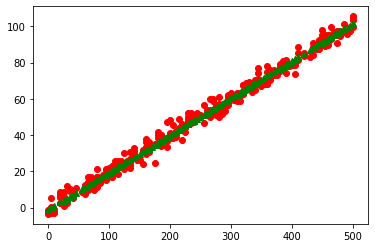

In [5]:
X_b_2 = np.c_[np.ones((len(x),1)),5*x]
theta_ , cost = grad_desc (X_b_2 , y , theta ,alpha , iterations)
print("theta0 : ",theta_[0][0],sep=' ')
print("theta1 : ",theta_[1][0],sep=' ')
print("cost : ",cost,sep=' ')

In [6]:
def grad_desc_2(x,y,theta,alpha,iterations):
    m=len(y)
    
    # this loop updates the magnitude of theta vector  
    for i in range(iterations):
        #we start prediction with initial condition
        prediction = np.dot(x,theta)  
        theta = theta - (1/m)*alpha*(np.dot(x.T,(prediction - y)))     
    cost = call_cost(theta,x,y)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(x[:,1],x[:,2],y,marker='o')
    ax.scatter(x[:,1],x[:,2],prediction,marker='^')
    plt.show()
    return theta , cost

In [ ]:
alpha = 0.00001 
iterations = 100000000
x_2 = x**2
X_b_3 = np.c_[np.ones((len(x),1)),x,x_2]
theta_ = np.random.randn(3,1)
theta_ , cost = grad_desc_2 (X_b_3 , y , theta_ ,alpha , iterations)
print("theta0 : ",theta_[0][0],sep=' ')
print("theta1 : ",theta_[1][0],sep=' ')
print("theta2 : ",theta_[2][0],sep=' ')
print("cost : ",cost,sep=' ')

In [ ]:
X = test.iloc[:, 0].values
Y = test.iloc[:, 1].values
A = (len(X)*((np.dot(X,Y)/len(X))- (np.mean(X))*(np.mean(Y))))/((len(X)-1)*(np.var(X)));
B = np.mean(Y)-A*np.mean(X);
MSE=sum((Y-(A*X+B))**2)/len(X);
print('A : ',A)
print('B : ',B)
print(MSE)
plt.plot(X, Y ,'ro',X,A*X+B , 'g^' )

Q 2 :

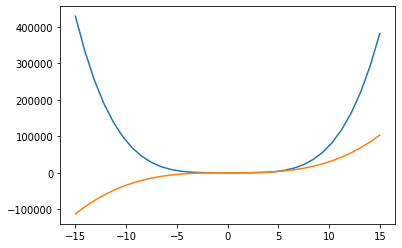

In [3]:
f = lambda x: x**2 -7*x**3 +8*x**4 - 12
f_prim = lambda x: 2*x - 21*x**2 + 32*x**3 
f_zegond = lambda x: 2 - -42*x + 96*x**2
X =  np.linspace(-15,15,33)
plt.plot(X,f(X))
plt.plot(X,f_prim(X))

In [14]:
def newton(f,Df,x0,epsilon,iteration):
    values =[]
    values.append(x0)
    xn = x0
    for n in range(0,iteration):
        if abs(f(xn)) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn , values
        xn = xn - f(xn)/Df(xn)
        values.append(xn)
    print('No solution found.')
    return None

Found solution after 90 iterations.
Found solution after 91 iterations.
The minimum is at the point x =   0.5406492645999833  and the value of the functions is equal to f(x) =  -12.13040506098638


<AxesSubplot:>

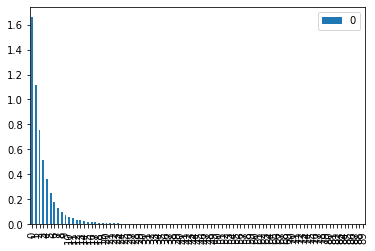

In [25]:
f = lambda x: x**2 -7*x**3 +8*x**4 - 12
f_prim = lambda x: 2*x - 21*x**2 + 32*x**3 
f_zegond = lambda x: 2 - -42*x + 96*x**2
ans_1,values1 = newton(f_prim,f_zegond,6,1e-5,1000)
ans_2,values2 = newton(f_prim,f_zegond,-8,1e-5,1000)
print("The minimum is at the point x =  ", ans_1 , " and the value of the functions is equal to f(x) = ",f(ans_1))
diff = []
for i in range(len(values1)-1):
    diff.append(values1[i]-values1[i+1])
df = pd.DataFrame(diff)    
df.plot.bar() 

Q 3 )

Specifically: 
X1 Relative Compactness <br>
X2 Surface Area <br>
X3 Wall Area <br>
X4 Roof Area <br>
X5 Overall Height <br>
X6 Orientation <br>
X7 Glazing Area <br>
X8 Glazing Area Distribution <br>
y1 Heating Load <br>
y2 Cooling Load<br>

In [15]:
# we have 768 dataset
data = pd.read_excel('ENB2012_data.xlsx')

Normalization of datas :





In [16]:
data1 = (data-data.min())/(data.max() - data.min());

In [17]:
def grad_desc_3(x,y,theta,alpha,iterations):
    m=len(y)
    
    # this loop updates the magnitude of theta vector  
    for i in range(iterations):
        #we start prediction with initial condition
        prediction = np.dot(x,theta)  
        theta = theta - (1/m)*alpha*(np.dot(x.T,(prediction - y)))     
    cost = call_cost(theta,x,y)
    return theta , cost 

In [28]:
alpha = 0.0000001 
iterations = 100000
theta_3 = np.random.randn(9,1)

training_data = data.iloc[:600,:] 
test_data = data.iloc[601:,:] 

X = pd.DataFrame(training_data , columns = ['X1','X2','X3','X4','X5','X6','X7','X8'])
Y1 = pd.DataFrame(training_data , columns = ['Y1'])
Y2 = pd.DataFrame(training_data , columns = ['Y2'] )                 
X = np.c_[np.ones((len(X),1)),X]

In [33]:
theta_Y1 , cost_Y1 = grad_desc_3 (X , Y1 , theta_3 ,alpha , iterations)
theta_Y2 , cost_Y2 = grad_desc_3 (X , Y2 , theta_3 ,alpha , iterations)


print("theta_Y1 : ",theta_Y1,sep=' ')
print("theta_Y2 : ",theta_Y2,sep=' ')
print("cost_Y1 : ",cost_Y1,sep=' ')
print("cost_Y2 : ",cost_Y2,sep=' ')

theta_Y1 :  [[ 0.29848395]
 [-0.78728847]
 [-0.45803611]
 [ 0.61387077]
 [ 0.78338375]
 [-0.73318994]
 [-0.00478318]
 [ 0.45221582]
 [-0.39345585]]
theta_Y2 :  [[ 0.29891005]
 [-0.78663753]
 [-0.4533633 ]
 [ 0.60903774]
 [ 0.78813667]
 [-0.72782296]
 [-0.00151456]
 [ 0.4515089 ]
 [-0.39764217]]
cost_Y1 :  Y1    23.377288
dtype: float64
cost_Y2 :  Y2    24.787776
dtype: float64


In [34]:
X_test = pd.DataFrame(test_data, columns = ['X1','X2','X3','X4','X5','X6','X7','X8'])
Y1_test = pd.DataFrame(test_data , columns = ['Y1'])
Y2_test = pd.DataFrame(test_data , columns = ['Y2'] )                 
X_test = np.c_[np.ones((len(X_),1)),X_test]

In [35]:
cost_Y1_test = call_cost(theta_Y1,X_test,Y1_test)
cost_Y2_test = call_cost(theta_Y2,X_test,Y2_test)
print("cost_Y1_test : ",cost_Y1_test)
print("cost_Y2_test : ",cost_Y2_test)

cost_Y1_test :  Y1    28.69356
dtype: float64
cost_Y2_test :  Y2    28.448248
dtype: float64


we split  data into 12 part and ....

In [170]:
cost_train_Y1 = []
cost_train_Y2 = []
cost_eval_Y1 = []
cost_eval_Y2 = []
theta_3 = np.random.randn(9,1)
for i in range(12):
    print(i)
    X_train = X[50*i: 50*(i+1) -5 ,:] 
    Y1_train = Y1.iloc[50*i: 50*(i+1) -5 ,:] 
    Y2_train = Y2.iloc[50*i: 50*(i+1) -5 ,:] 
    theta_Y1 , cost_Y1 = grad_desc_3 (X_train , Y1_train , theta_3 ,alpha , iterations)
    theta_Y2 , cost_Y2 = grad_desc_3 (X_train , Y2_train , theta_3 ,alpha , iterations)
    cost_train_Y1.append(cost_Y1)
    cost_train_Y2.append(cost_Y2)
    
    X_eval = X[50*(i+1)-5: 50*(i+1),:]
    Y1_eval = Y1[50*(i+1)-5: 50*(i+1),:]
    Y2_eval = Y2[50*(i+1)-5: 50*(i+1),:]
    cost_eval_Y1.append(call_cost(theta_Y1,X_eval,Y1_eval))
    cost_eval_Y2.append(call_cost(theta_Y2,X_eval,Y2_eval))
t = list(range(12)) 
plt.subplot(1, 2, 1)
plt.plot(t, cost_train_Y1 ,'ro',t,cost_eval_Y1 , 'g^' )   
plt.subplot(1, 2, 2)
plt.plot(t, cost_train_Y2 ,'ro',t,cost_eval_Y2 , 'g^' )  

0


TypeError: '(slice(45, 50, None), slice(None, None, None))' is an invalid key

Q 4 )


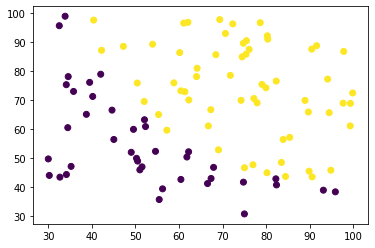

In [11]:
import scipy.io
Data_ = scipy.io.loadmat('data_logistic.mat')
Data = Data_['logistic_data']
plt.scatter(Data[:,0],Data[:,1],c=Data[:,2])
plt.show()

In [5]:
def cost4(theta,x,y):
    m=len(x)
    o = x.dot(theta)  
    prediction_ = 1/(1 + np.exp(-1*(np.dot(x,theta))))
    cost = (-1/m) * np.sum((np.dot(y.T , np.log(prediction_)) + np.dot((1-y.T) , np.log(1-prediction_))))
    return cost

In [12]:
def grad_desc4(x,y,theta,alpha,iterations):
    m=len(y)
    for i in range(iterations):
        #we start prediction with initial condition
        prediction = 1/(1 + np.exp(-1*(np.dot(x,theta)))) 
        theta = theta - (1/m)*alpha*(np.dot(x.T,(prediction - y)))  
    
    cost = cost4(theta,x,y)
    return theta , cost  

In [13]:
alpha = 0.00001 
iterations = 100000
theta_ = np.random.randn(3,1)  # random initial condition 
# this line concatinate 1 to a x vector to make theta vector and x vector the same size 
X_b_ = np.c_[np.ones((len(Data[:,1]),1)),Data[:,0],Data[:,1]]
y = np.c_[Data[:,2]]
thetaa , costt  = grad_desc4 (X_b_ , y , theta_ ,alpha , iterations)
print("thetaa",thetaa)
print("costt : ",costt,sep=' ')

thetaa [[ 0.46128783]
 [ 0.00723796]
 [-0.0031258 ]]
costt :  0.6629455315732798


In [117]:
def cost_L2(theta,x,y,landa):
    m=len(x)
    o = x.dot(theta)  
    prediction_ = 1/(1 + np.exp(-1*(np.dot(x,theta))))
    cost = (-1/m) * np.sum((np.dot(y.T , np.log(prediction_))
                            + np.dot((1-y.T) , np.log(1-prediction_)))) + landa * np.sum(theta ** 2)
    return cost

In [120]:
def L2_norm(x,y,theta,alpha,landa,iterations):
    m=len(y)
    for i in range(iterations):
        #we start prediction with initial condition
        prediction = 1/(1 + np.exp(-1*(np.dot(x,theta)))) 
        theta = theta*(1 - (alpha*landa/m)) - (1/m)*alpha*(np.dot(x.T,(prediction - y)))   
    cost = cost_L2(theta,x,y,landa)
    return theta , cost 

In [128]:
alpha = 0.00001 
iterations = 100000
landa = 0.1
# theta_ = np.random.randn(3,1)  # random initial condition 
# this line concatinate 1 to a x vector to make theta vector and x vector the same size 
X_b_ = np.c_[np.ones((len(Data[:,1]),1)),Data[:,0],Data[:,1]]
y = np.c_[Data[:,2]]
thetaa , costt = L2_norm (X_b_ , y , theta_ ,alpha, landa, iterations)
print("thetaa",thetaa)
print("costt : ",costt,sep=' ')

thetaa [[ 0.39576991]
 [ 0.00768916]
 [-0.00261854]]
costt :  0.6737987844108141
